# Edgar inventory processing

This tutorial will show you how to process Edgar inventory.

We will perform the following steps:

* Load the data
* Create a grid for the output 
* Remap the inventory to the grid
* Process the data
* Save the output


## EDGAR files

Let's have a look at the EDGAR netcdf files.

They are allowed to download from the [EDGAR website](https://edgar.jrc.ec.europa.eu/emissions_data_and_maps)  for free, but the easiest way to get them is to use emiproc's 
`download_edgar` function below

In [1]:
from pathlib import Path
from emiproc.inventories.edgar import download_edgar_files

local_dir = Path("./edgar")
local_dir.mkdir(exist_ok=True)

In [2]:
download_edgar_files(local_dir, year=2022, substances=["CH4", "CO2", "CO2bio"])

Downloaded 49 files.


Let's look at one of the downloaded files


In [3]:
import xarray as xr


path_edgar_file = local_dir / "v8.0_FT2022_GHG_CH4_2022_ENE_emi.nc"

ds = xr.open_dataset(path_edgar_file)
ds

<xarray.Dataset> Size: 26MB
Dimensions:    (lat: 1800, lon: 3600)
Coordinates:
  * lat        (lat) float64 14kB -89.95 -89.85 -89.75 ... 89.75 89.85 89.95
  * lon        (lon) float64 29kB -179.9 -179.8 -179.8 ... 179.8 179.8 179.9
Data variables:
    emissions  (lat, lon) float32 26MB ...
Attributes:
    institution:       European Commission, Joint Research Centre
    source:            https://edgar.jrc.ec.europa.eu/dataset_ghg80
    how_to_cite:       https://edgar.jrc.ec.europa.eu/dataset_ghg80#howtocite
    copyright_notice:  https://edgar.jrc.ec.europa.eu/dataset_ghg80#conditions
    contacts:          https://edgar.jrc.ec.europa.eu/dataset_ghg80#info JRC-...

It would be annoying to have to create code to parse inventory files for every project.

The goal of emiproc is to provide a simple interface to read emissions inventories.
In this case you can use the `EDGARv8` class which reads the edgar files and load them as an `Inventory` object.

In [4]:
from emiproc.inventories.edgar import EDGARv8

# Load the edgard inventory
inv = EDGARv8(local_dir / "v8.0_*.nc")
inv

Inventory(EDGARv8)

## Visualizing the inventory


Let's see what we have in your inventory.

emiproc profiles some functions for helping us.

In [5]:
# We can look at the total emissions of the inventory (units are in kg/year)
inv.total_emissions.T

CO2           CH4  \
Agricultural soils                          1.505788e+11  3.647085e+10   
Chemical processes                          7.609800e+11  3.591839e+08   
Power Industry                              1.466928e+13  4.982441e+08   
Combustion for manufacturing                6.537542e+12  6.950362e+08   
Iron and steel production                   2.670123e+11  1.596799e+08   
Non energy use of fuels                     2.779255e+10           NaN   
Non-ferrous metals production               1.228363e+11           NaN   
Non-metallic minerals production            1.982623e+12           NaN   
Fuel exploitation                           3.819373e+11  1.167732e+11   
Solvents and products use                   6.510489e+10           NaN   
Energy for buildings                        3.421570e+12  1.133221e+10   
Oil refineries and Transformation industry  2.149961e+12  6.650997e+09   
Solid waste incineration                    1.720349e+10  1.708411e+09   
Aviation climbing_and_descent               2.880314e+11  2.016137e+06   
Aviation cruise                             3.886084e+11  2.720146e+06   
Aviation landing_and_takeoff                9.212053e+10  6.448174e+05   
Railways, pipelines, off-road transport     2.553750e+11  8.751226e+06   
Shipping                                    9.060895e+11  8.333782e+07   
Road transportation                         6.037368e+12  9.613296e+08   
__total__                                   3.852201e+13  3.883260e+11   
Agricultural waste burning                           NaN  2.336499e+09   
Enteric fermentation                                 NaN  1.122747e+11   
Manure management                                    NaN  1.272364e+10   
Solid waste landfills                                NaN  3.844845e+10   
Waste water handling                                 NaN  4.683614e+10   

                                                  CO2bio  
Agricultural soils                                   NaN  
Chemical processes                                   NaN  
Power Industry                              7.798933e+11  
Combustion for manufacturing                2.000333e+12  
Iron and steel production                            NaN  
Non energy use of fuels                              NaN  
Non-ferrous metals production                        NaN  
Non-metallic minerals production                     NaN  
Fuel exploitation                           2.828933e+11  
Solvents and products use                            NaN  
Energy for buildings                        3.050478e+12  
Oil refineries and Transformation industry  5.612932e+10  
Solid waste incineration                    6.619834e+09  
Aviation climbing_and_descent                        NaN  
Aviation cruise                                      NaN  
Aviation landing_and_takeoff                         NaN  
Railways, pipelines, off-road transport     2.066671e+09  
Shipping                                    2.562250e+09  
Road transportation                         2.980679e+11  
__total__                                   7.790079e+12  
Agricultural waste burning                  1.311036e+12  
Enteric fermentation                                 NaN  
Manure management                                    NaN  
Solid waste landfills                                NaN  
Waste water handling                                 NaN

Plot the inventory using built-in functions.


passsed CO2,Manure management no data
passsed CO2,Agricultural waste burning no data
passsed CO2,Waste water handling no data
passsed CO2,Solid waste landfills no data
passsed CO2,Enteric fermentation no data


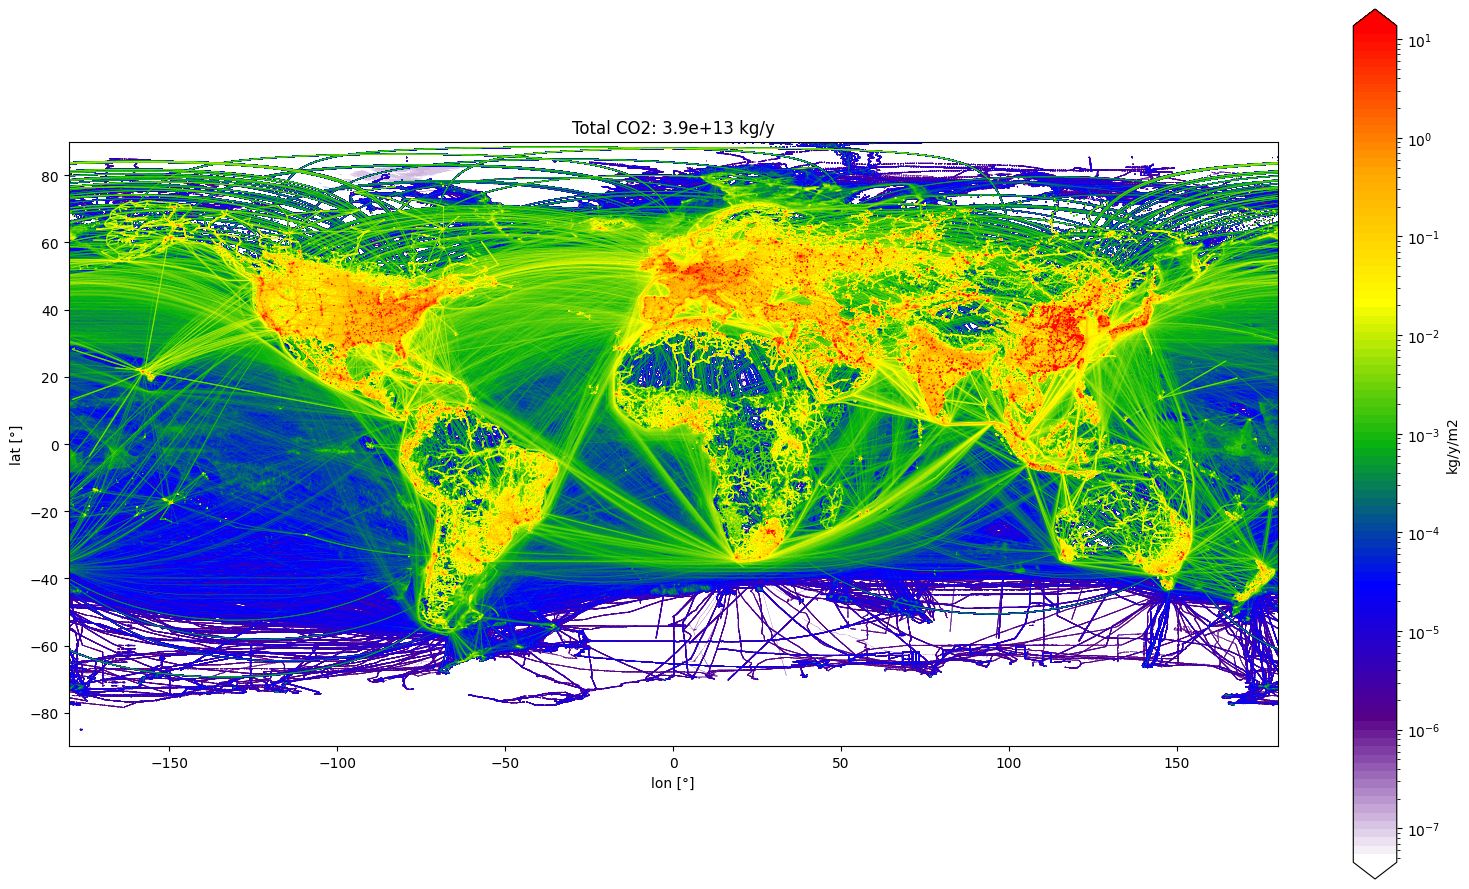

passsed CH4,Non-metallic minerals production no data
passsed CH4,Non energy use of fuels no data
passsed CH4,Non-ferrous metals production no data
passsed CH4,Solvents and products use no data


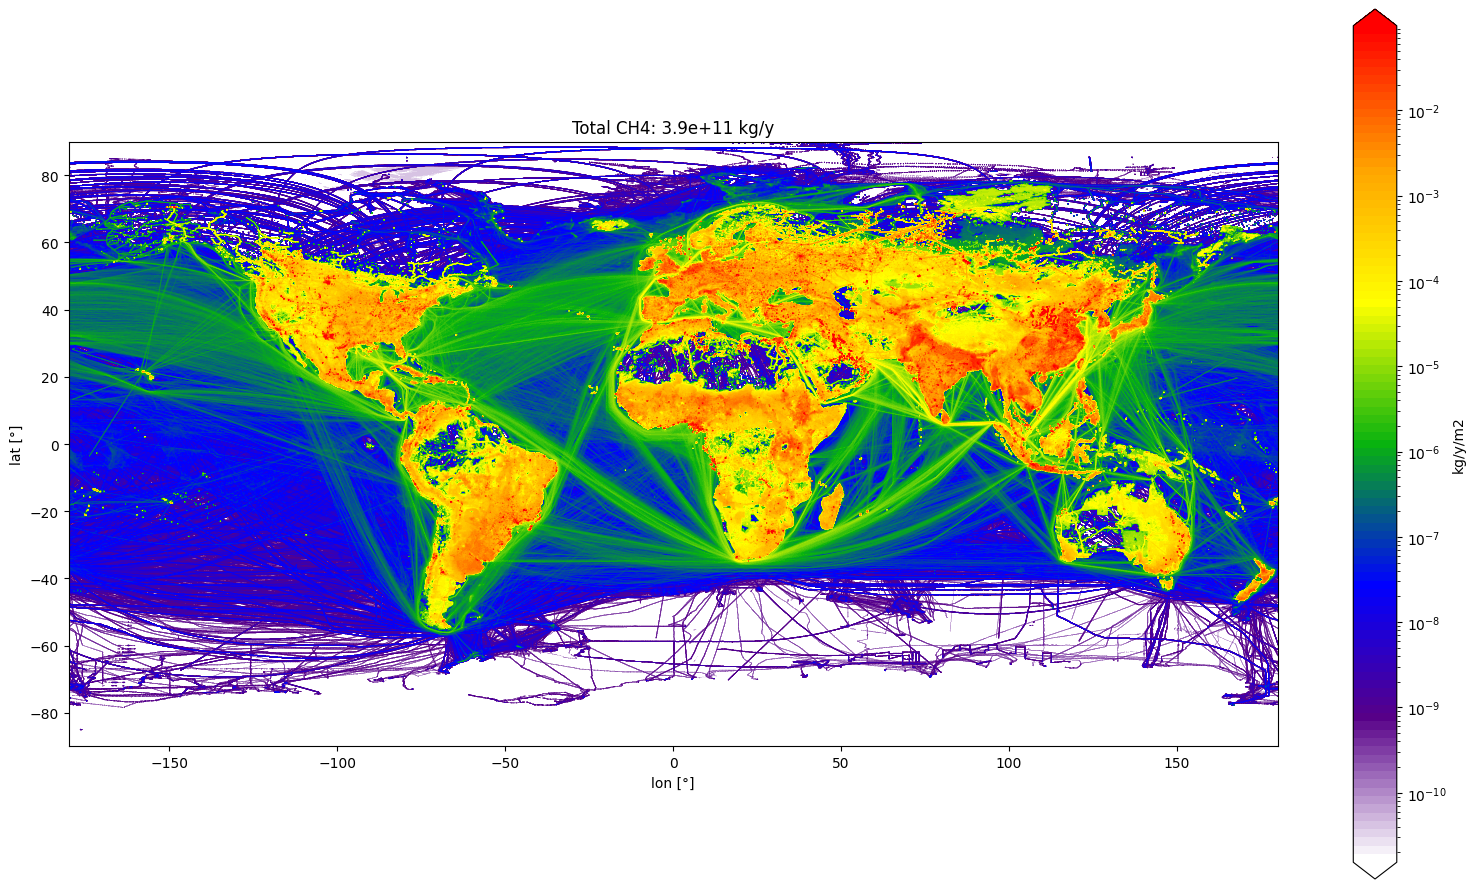

passsed CO2bio,Manure management no data
passsed CO2bio,Aviation climbing_and_descent no data
passsed CO2bio,Agricultural soils no data
passsed CO2bio,Waste water handling no data
passsed CO2bio,Non-metallic minerals production no data
passsed CO2bio,Iron and steel production no data
passsed CO2bio,Non energy use of fuels no data
passsed CO2bio,Solid waste landfills no data
passsed CO2bio,Aviation cruise no data
passsed CO2bio,Chemical processes no data
passsed CO2bio,Non-ferrous metals production no data
passsed CO2bio,Aviation landing_and_takeoff no data
passsed CO2bio,Solvents and products use no data
passsed CO2bio,Enteric fermentation no data


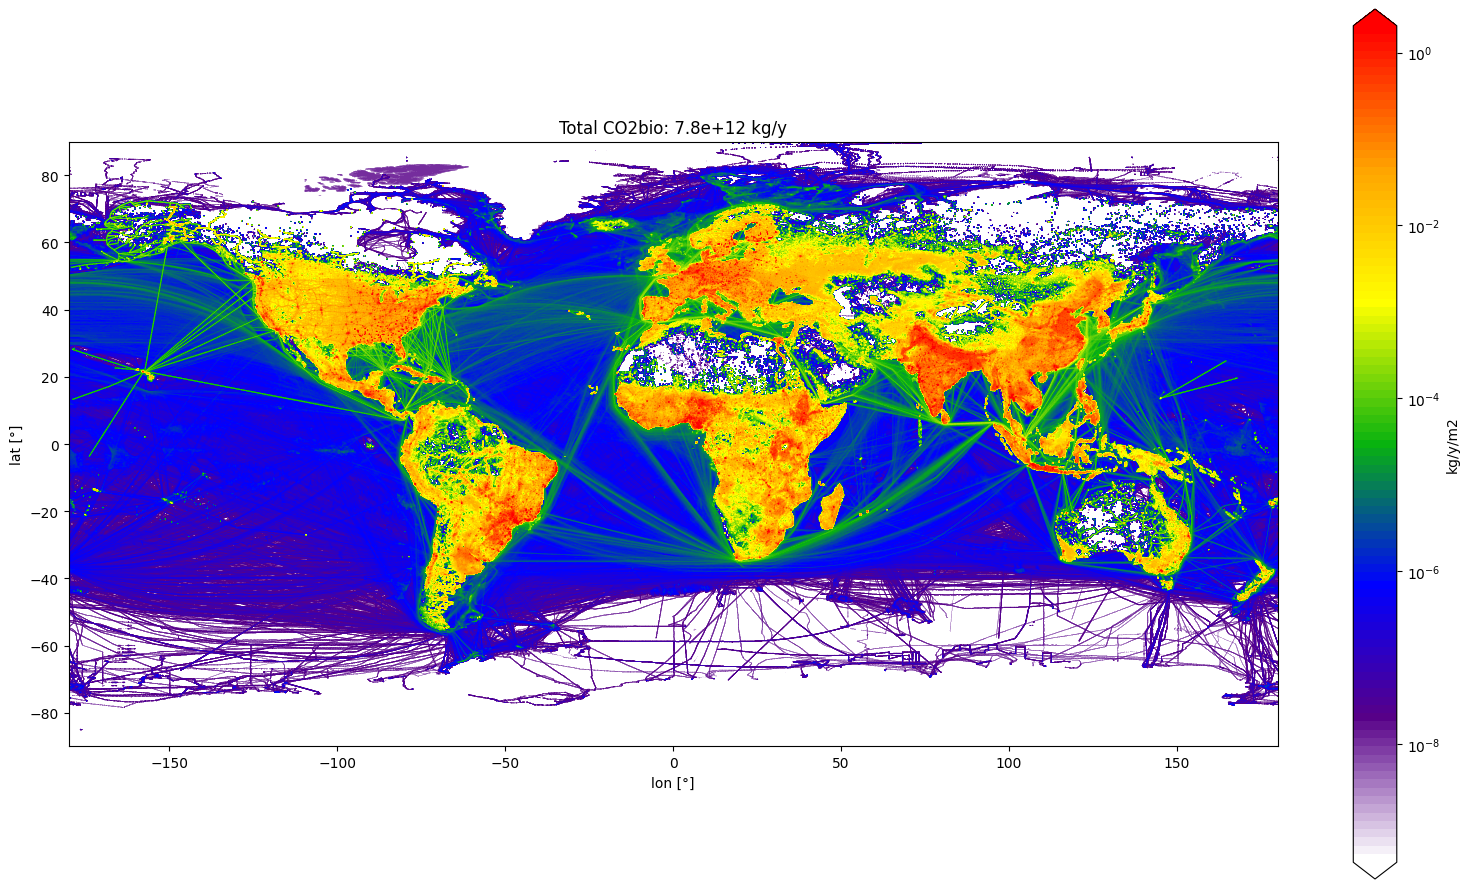

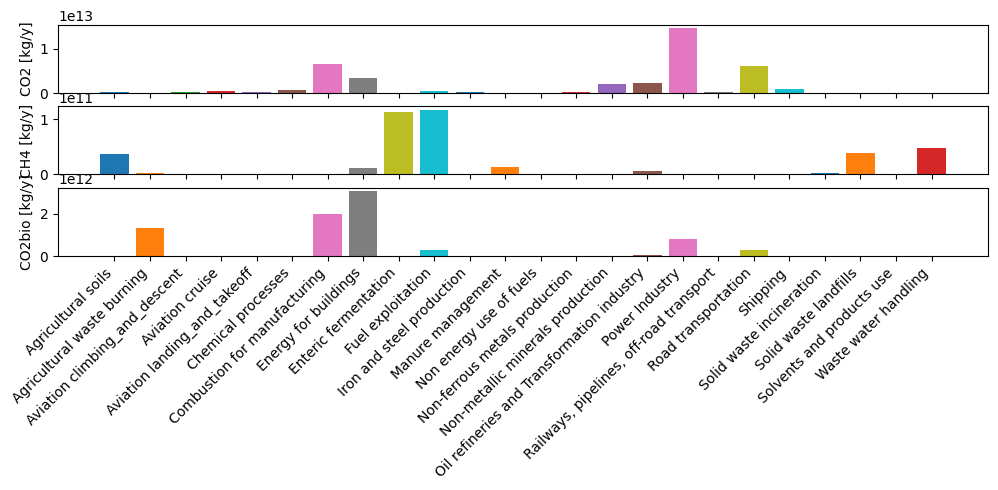

In [6]:
import matplotlib.pyplot as plt
from emiproc.plots import plot_inventory
plt.style.use('default')

plot_inventory(inv, total_only=True)

From these results we can how the emissions are distributed in the world. 

We can also see in the totals, that the largest categories of emissions for methane are 
`Enteric fermentation` and `Fuel exploitation`. For CO2, the `Power Industry` is the largest category, followed by `Road Transportation`, `Combustion for manufacturing` and `Energy for buildings`.

Most of those categories can be reduced by the electrification of the economy and renewable power sources, except `Enteric fermentation` which is the process emissions from cows and other ruminants digesting food.

`Enteric fermentation` is actually much easier and faster to solve than the other sectors, as we can simply change our own diet and stop eating meat.

Also note that many "natural" CO2 emissions also come from meat production, because of deforestation (not available in edgar) so this is a double win.


## Processing the inventory

This step will show some standard operations you might want to do with the inventory.

### Remapping the inventory

Now we will remap the inventory to a grid.

Let's say we want to make a simulation over Australia.
First we need to create a grid.

In some cases you will already have a grid for you simulation, so you can load it directly.

In [7]:
from emiproc.grids import RegularGrid

# The grid can be defined by various parameters
# See the documentation for more details
# https://emiproc.readthedocs.io/en/master/api/grids.html#emiproc.grids.RegularGrid
australian_grid = RegularGrid(xmin=110, xmax=160, ymin=-45, ymax=-10, nx=200, ny=160)
australian_grid

RegularGrid(x(110,160)_y(-45,-10)_nx(200)_ny(160))

In [8]:
# Remap the inventory on the grid
from emiproc.regrid import remap_inventory

remapped = remap_inventory(inv, australian_grid)
remapped

C:\Users\coli\Documents\emiproc\emiproc\regrid.py:251: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_weights.geometry_inter.area / gdf_weights.geometry.area


Inventory(Inventory)

Let's look at our remapped inventory.

passsed CO2,Manure management no data
passsed CO2,Agricultural waste burning no data
passsed CO2,Waste water handling no data
passsed CO2,Solid waste landfills no data
passsed CO2,Enteric fermentation no data


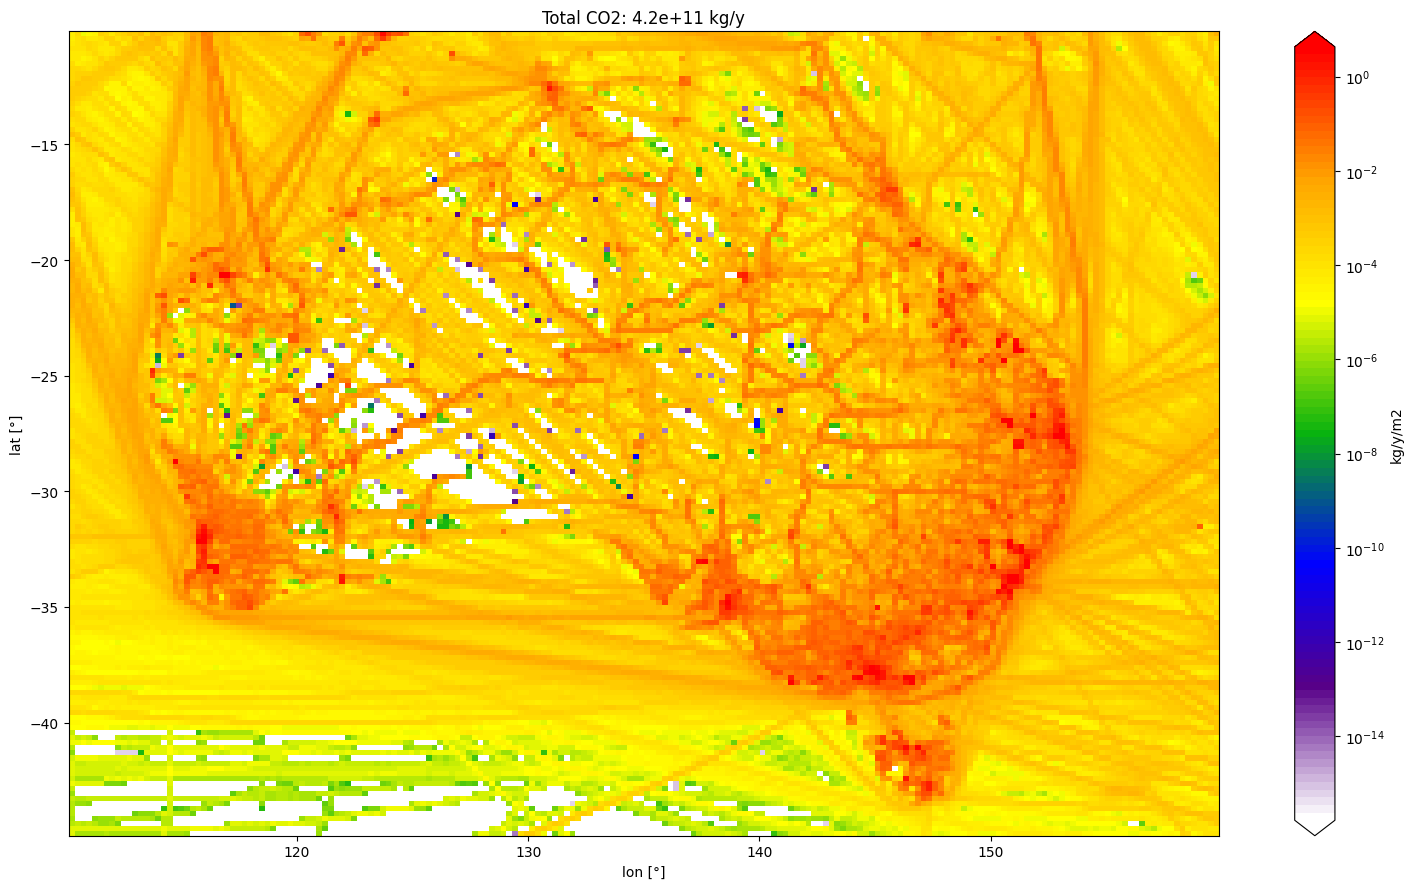

passsed CH4,Non-metallic minerals production no data
passsed CH4,Non energy use of fuels no data
passsed CH4,Non-ferrous metals production no data
passsed CH4,Solvents and products use no data


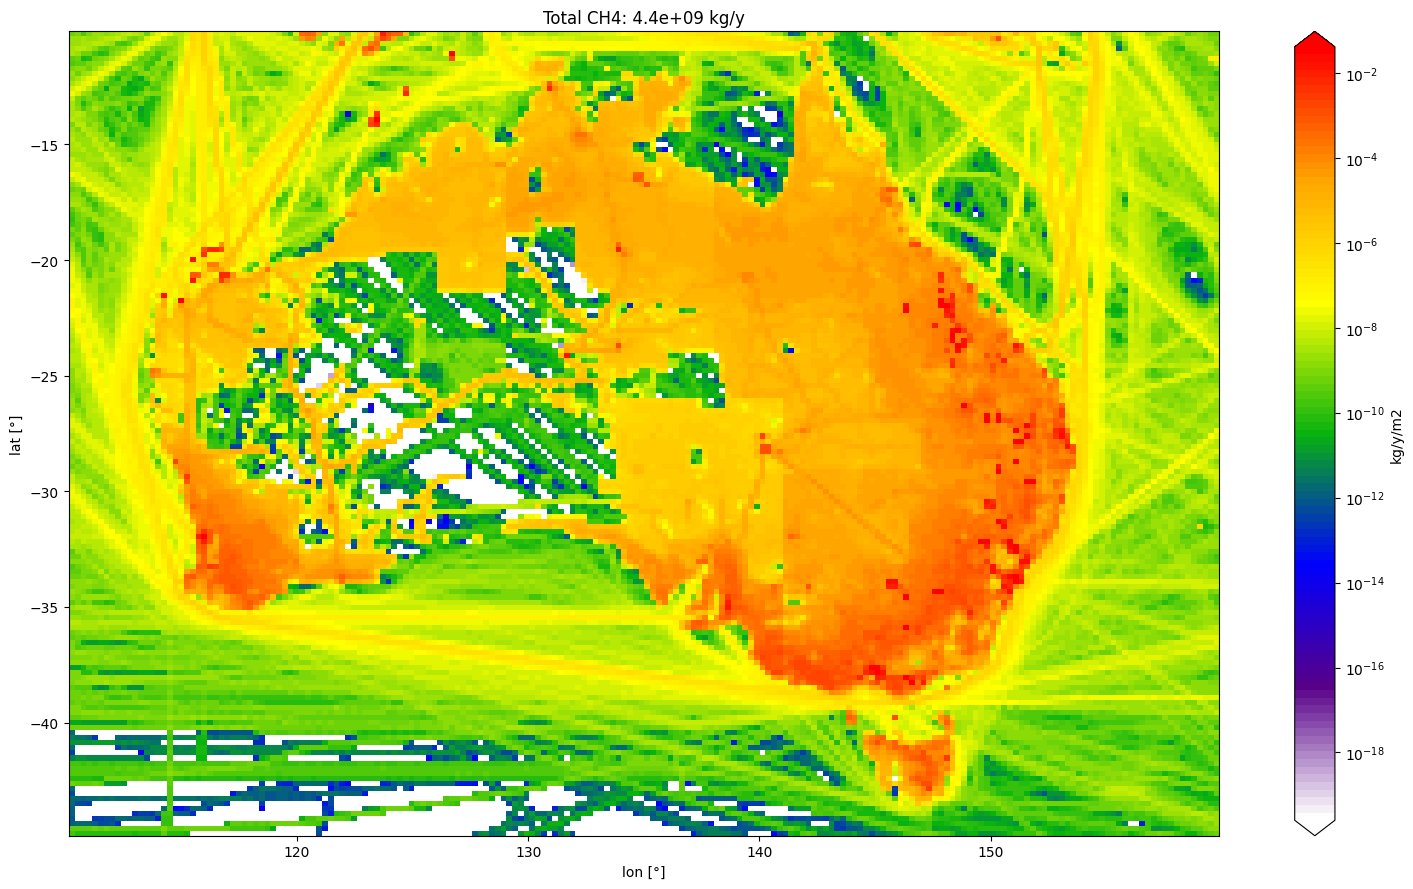

passsed CO2bio,Manure management no data
passsed CO2bio,Aviation climbing_and_descent no data
passsed CO2bio,Agricultural soils no data
passsed CO2bio,Waste water handling no data
passsed CO2bio,Non-metallic minerals production no data
passsed CO2bio,Iron and steel production no data
passsed CO2bio,Railways, pipelines, off-road transport no emissions
passsed CO2bio,Non energy use of fuels no data
passsed CO2bio,Solid waste incineration no emissions
passsed CO2bio,Solid waste landfills no data
passsed CO2bio,Aviation cruise no data
passsed CO2bio,Chemical processes no data
passsed CO2bio,Non-ferrous metals production no data
passsed CO2bio,Aviation landing_and_takeoff no data
passsed CO2bio,Oil refineries and Transformation industry no emissions
passsed CO2bio,Solvents and products use no data
passsed CO2bio,Enteric fermentation no data


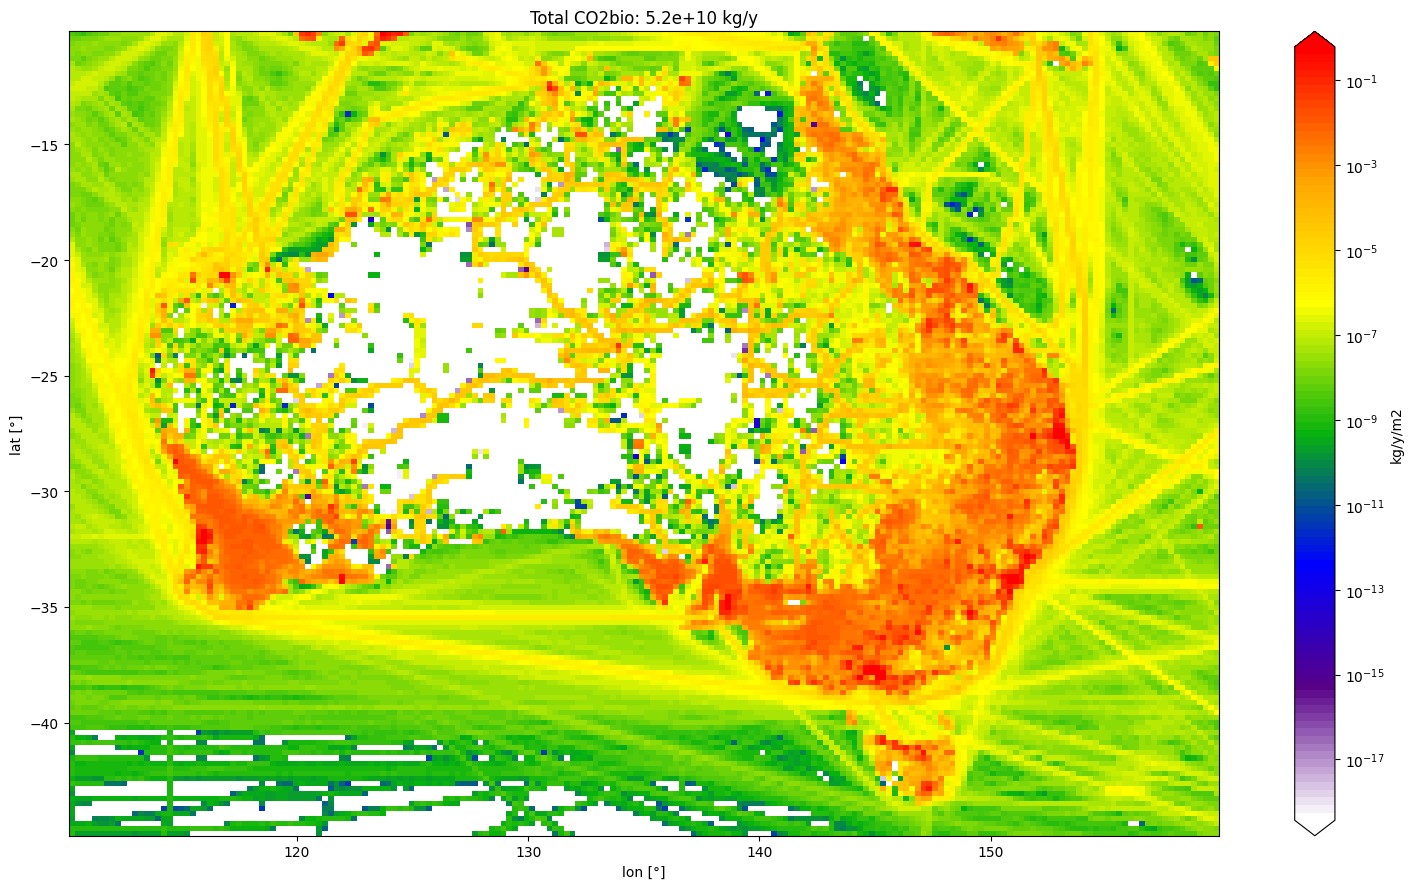

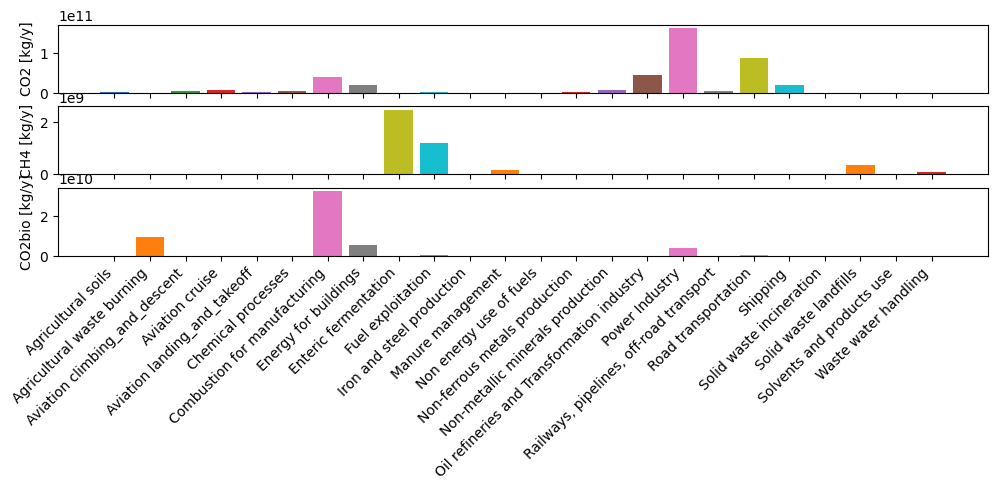

In [9]:
plot_inventory(remapped, total_only=True)

For this domain, the panorama is quite different. 
For example waste is well managed in Australia so its fraction in the total is smaller.
Or maybe Australians send their waste to Asia or Africa, who knows ?

### Groupping categories

Many categories are similar and have very small emissions.

In this case we can group some together to have less emission sectors.

In [10]:
from emiproc.inventories.utils import group_categories

grouped = group_categories(
    remapped,
    categories_group={
        "agriculture": [
            "Agricultural soils",
            "Agricultural waste burning",
            "Manure management",
        ],
        "industry": [
            "Chemical processes",
            "Power Industry",
            "Oil refineries and Transformation industry",
            "Fuel exploitation",
            "Energy for buildings",
            "Combustion for manufacturing",
            "Iron and steel production",
            'Non energy use of fuels',
            'Solvents and products use',
            'Non-ferrous metals production',
            'Non-metallic minerals production',
        ],
        "livestock": ["Enteric fermentation"],
        "waste": [
            "Waste water handling",
            "Solid waste incineration",
            "Solid waste landfills",
        ],
        "transportation": [
            "Aviation climbing_and_descent",
            "Aviation cruise",
            "Aviation landing_and_takeoff",
            "Railways, pipelines, off-road transport",
            "Shipping",
            "Road transportation",
        ],
    },
)
grouped.total_emissions.T

CO2           CH4        CO2bio
agriculture     2.511675e+09  1.982405e+08  9.643720e+09
industry        2.890639e+11  1.234076e+09  4.213225e+10
waste           1.624781e+07  4.603737e+08           NaN
transportation  1.276029e+11  9.711887e+06  6.677173e+08
__total__       4.191947e+11  4.363407e+09  5.244368e+10
livestock                NaN  2.461004e+09           NaN

### Merge the CO2 emissions

In the end we only want to have the total of CO2. 
To do that we can sum the biogenic CO2 with the fossil CO2.

In [11]:
from emiproc.speciation import merge_substances


merged = merge_substances(grouped, {"CO2": ["CO2", "CO2bio"]})
merged.total_emissions.T

CO2           CH4
agriculture     1.215540e+10  1.982405e+08
industry        3.311962e+11  1.234076e+09
waste           1.624781e+07  4.603737e+08
transportation  1.282706e+11  9.711887e+06
__total__       4.716384e+11  4.363407e+09
livestock                NaN  2.461004e+09

## Final look

Before exporting the inventory, let's have a look at the final result.

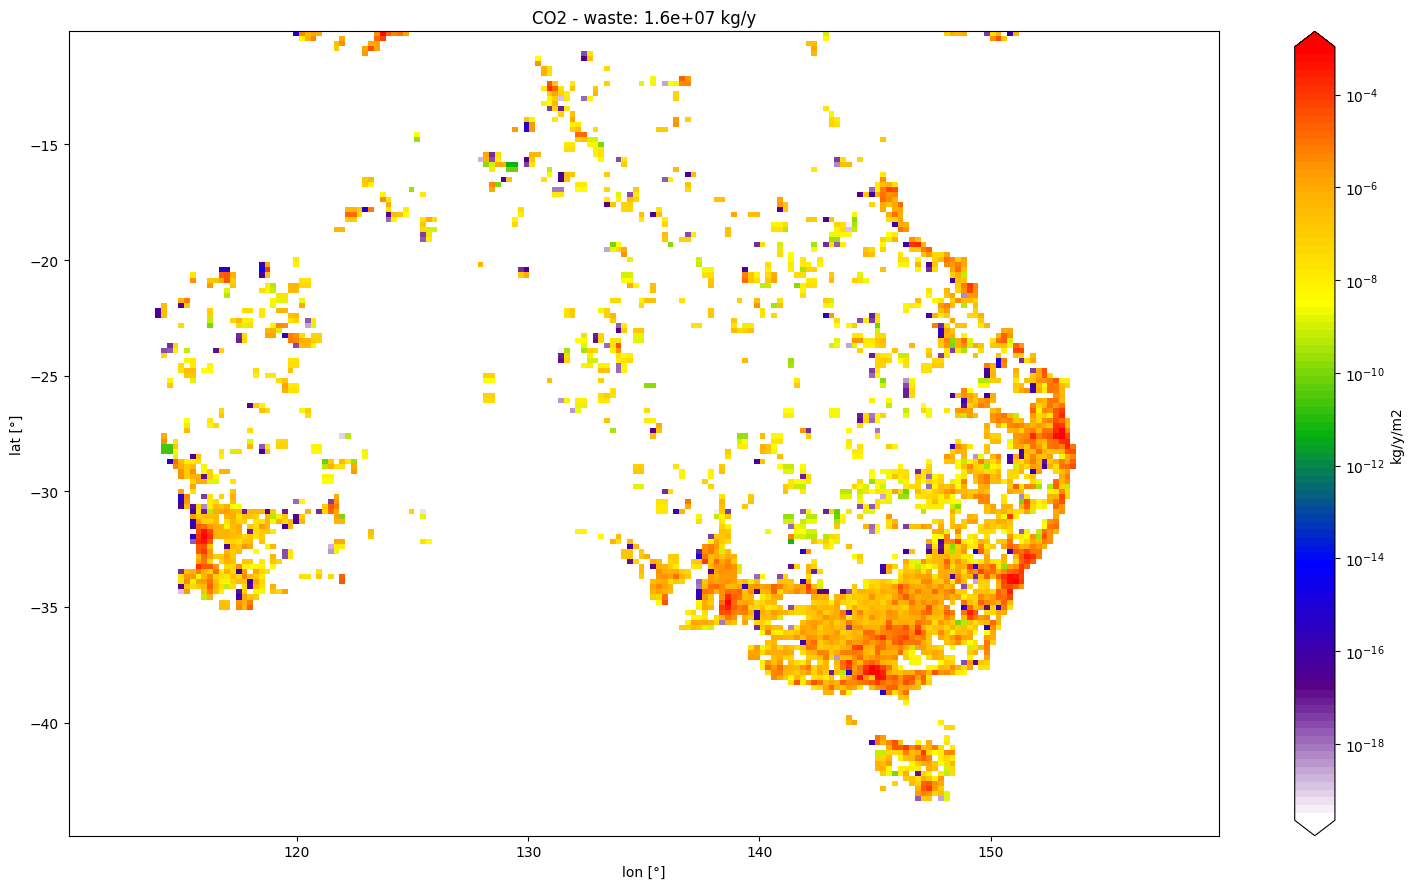

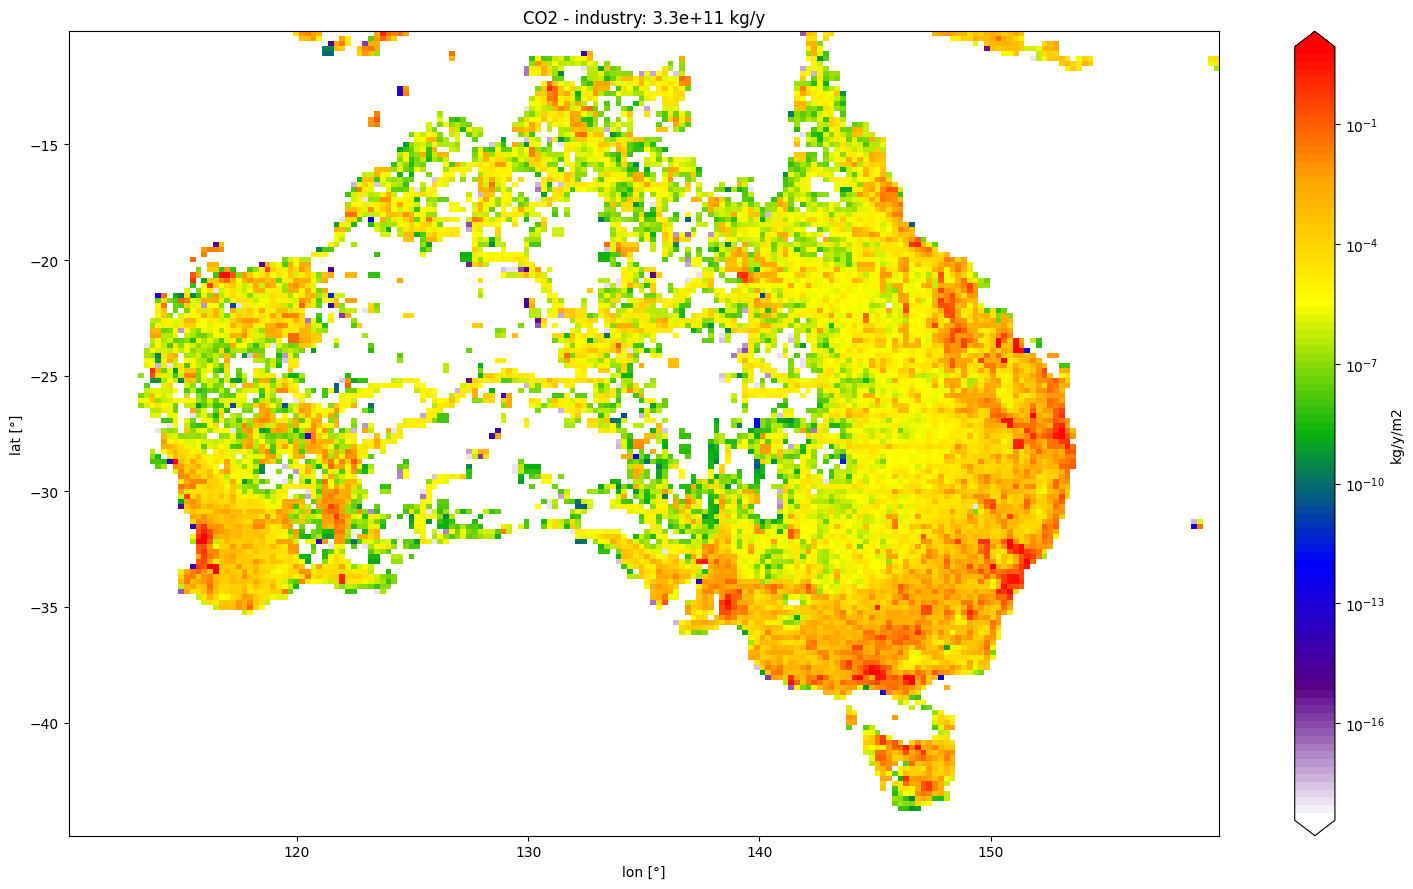

passsed CO2,livestock no data


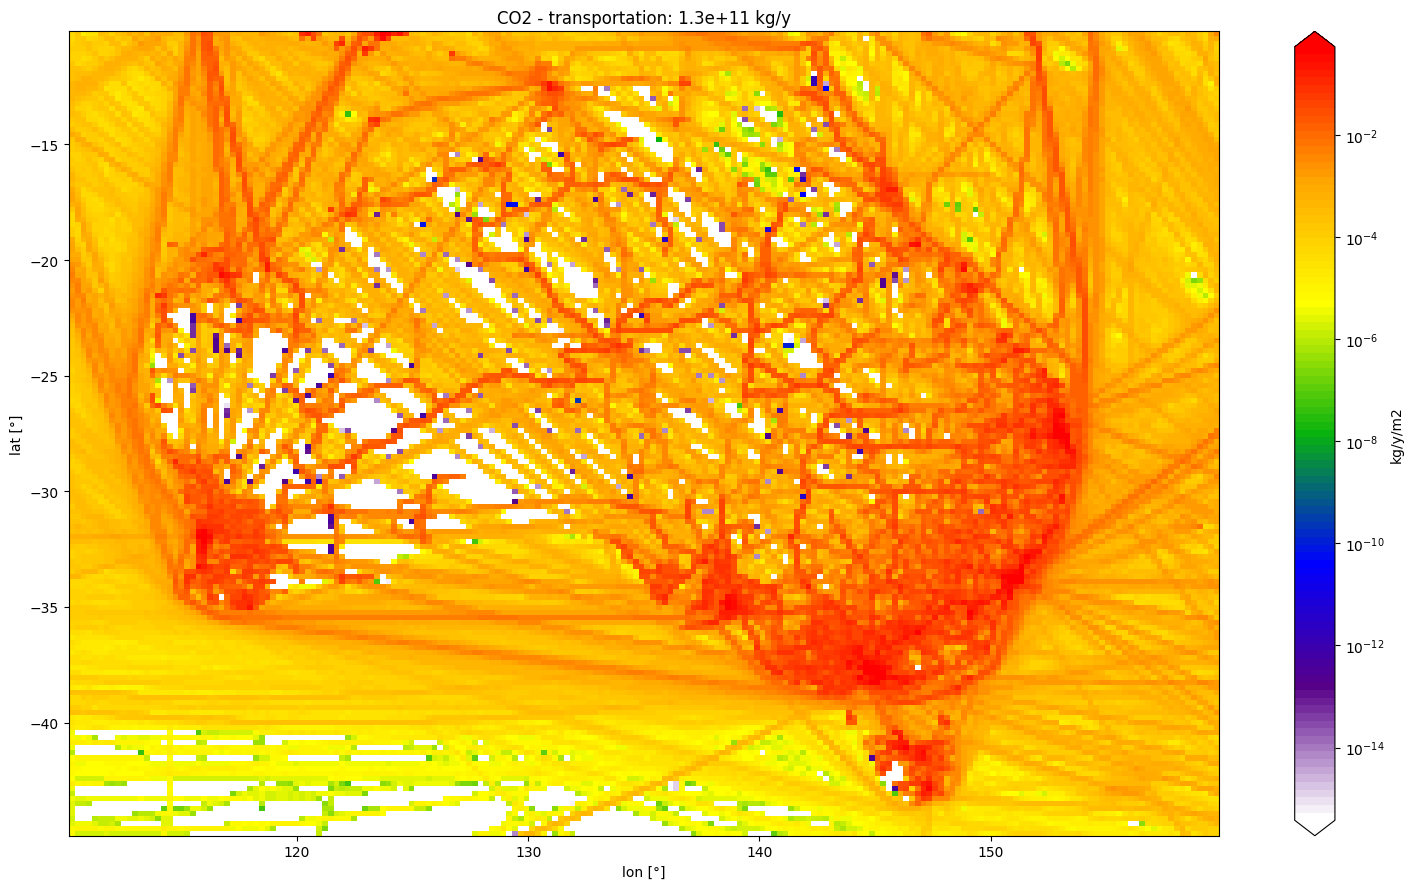

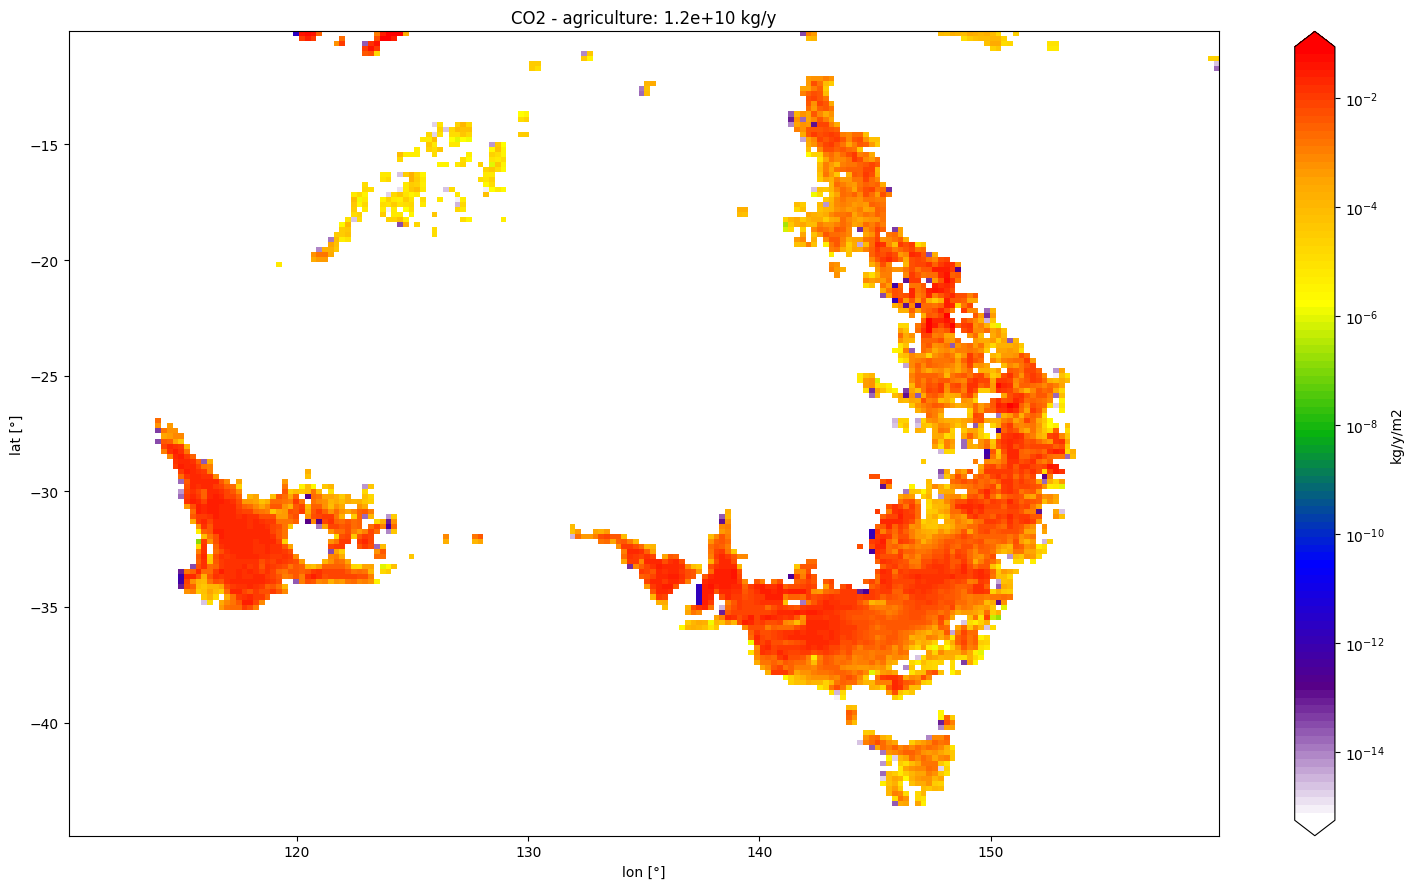

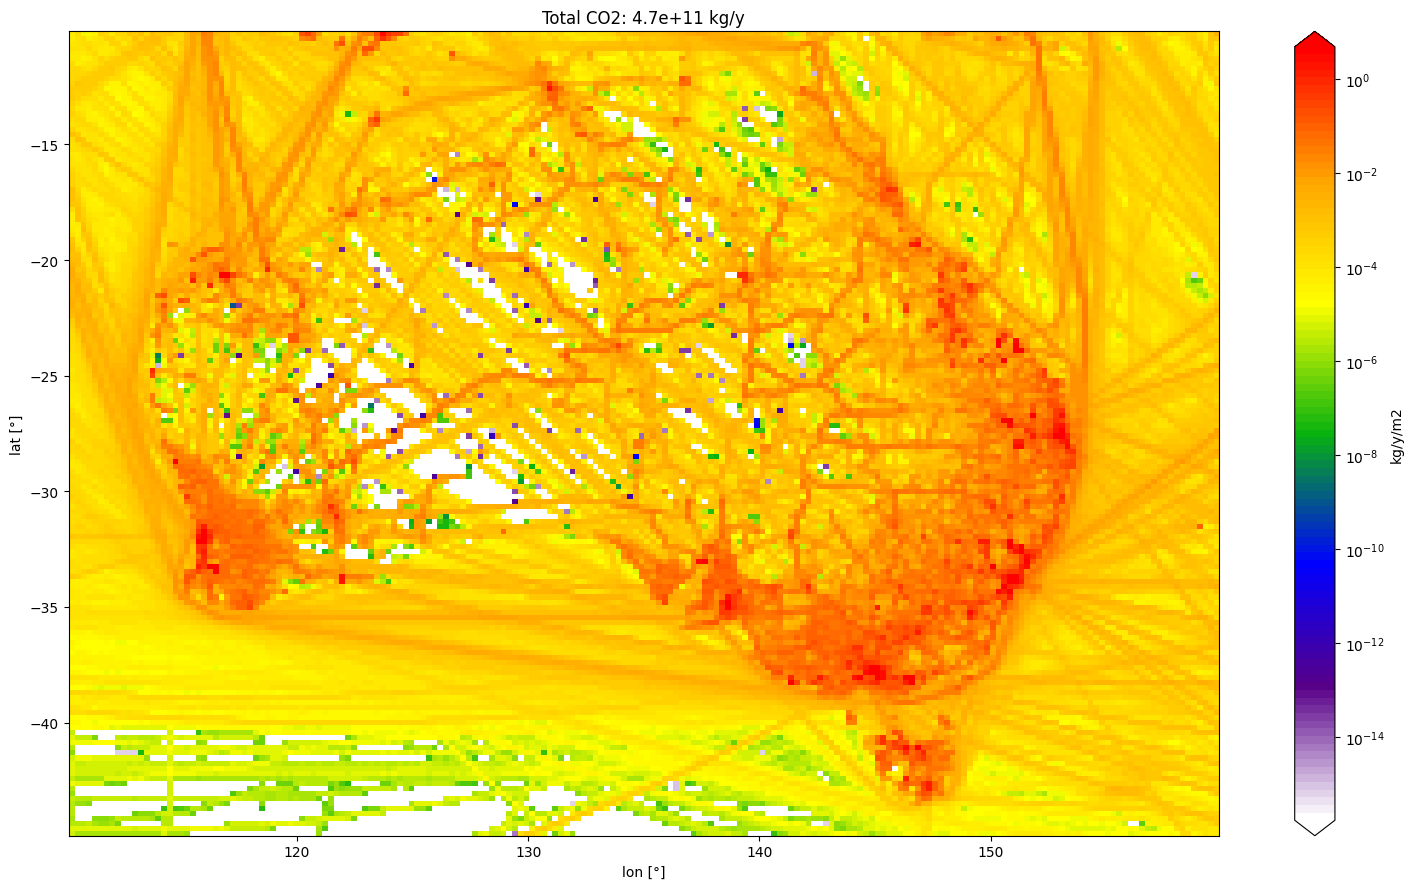

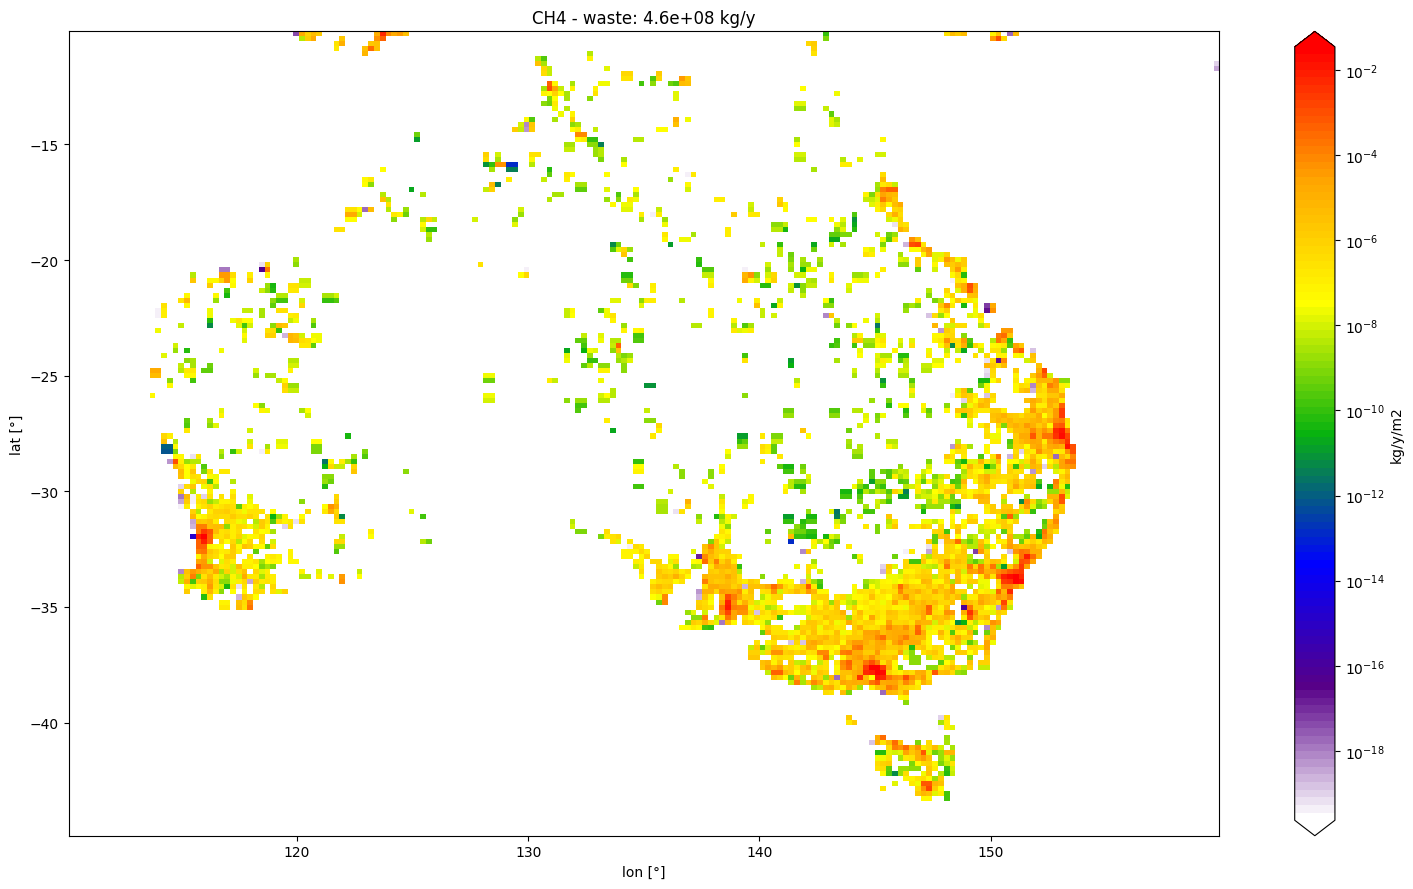

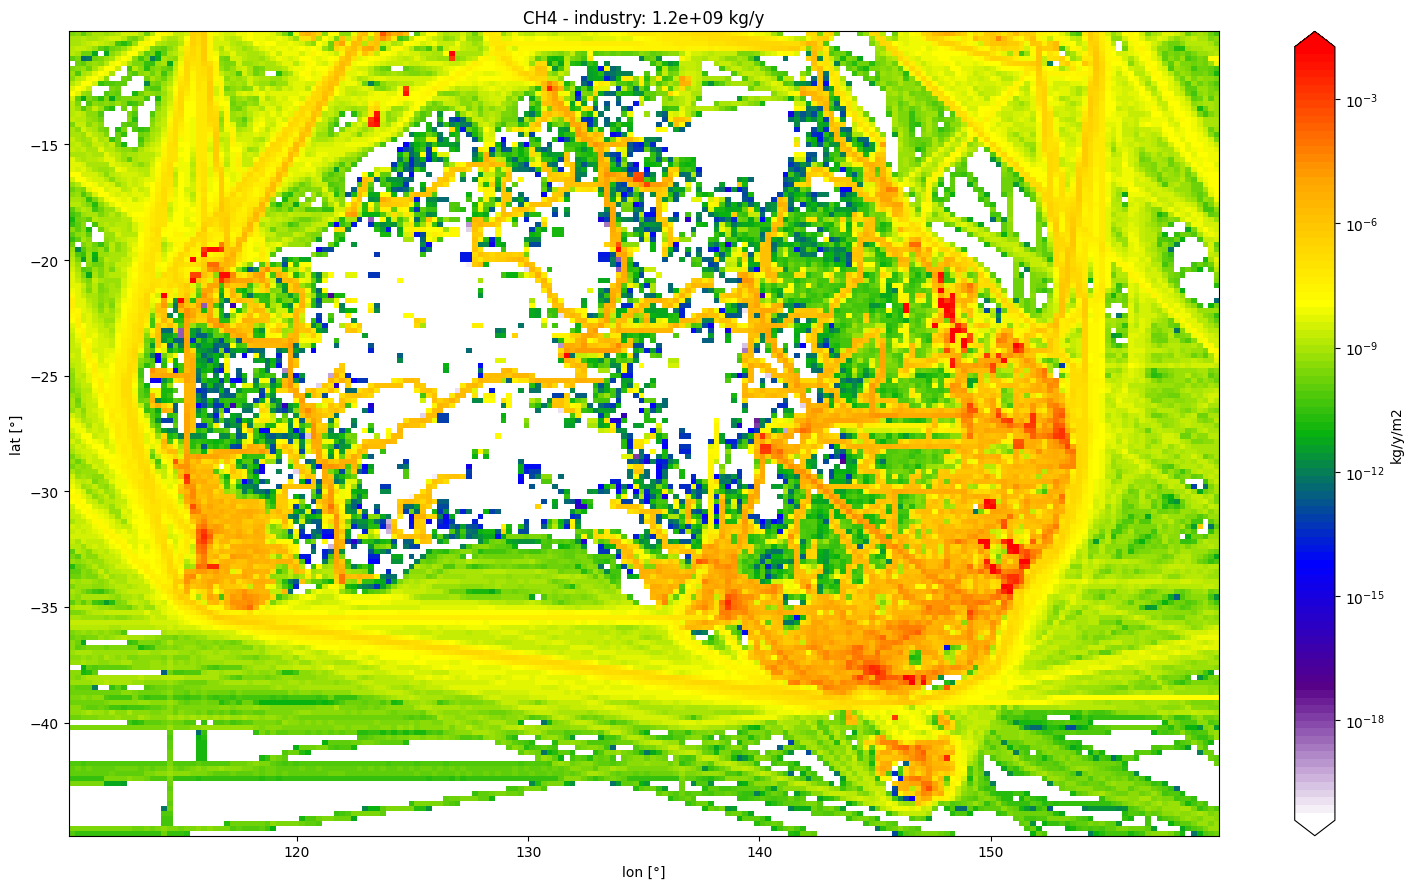

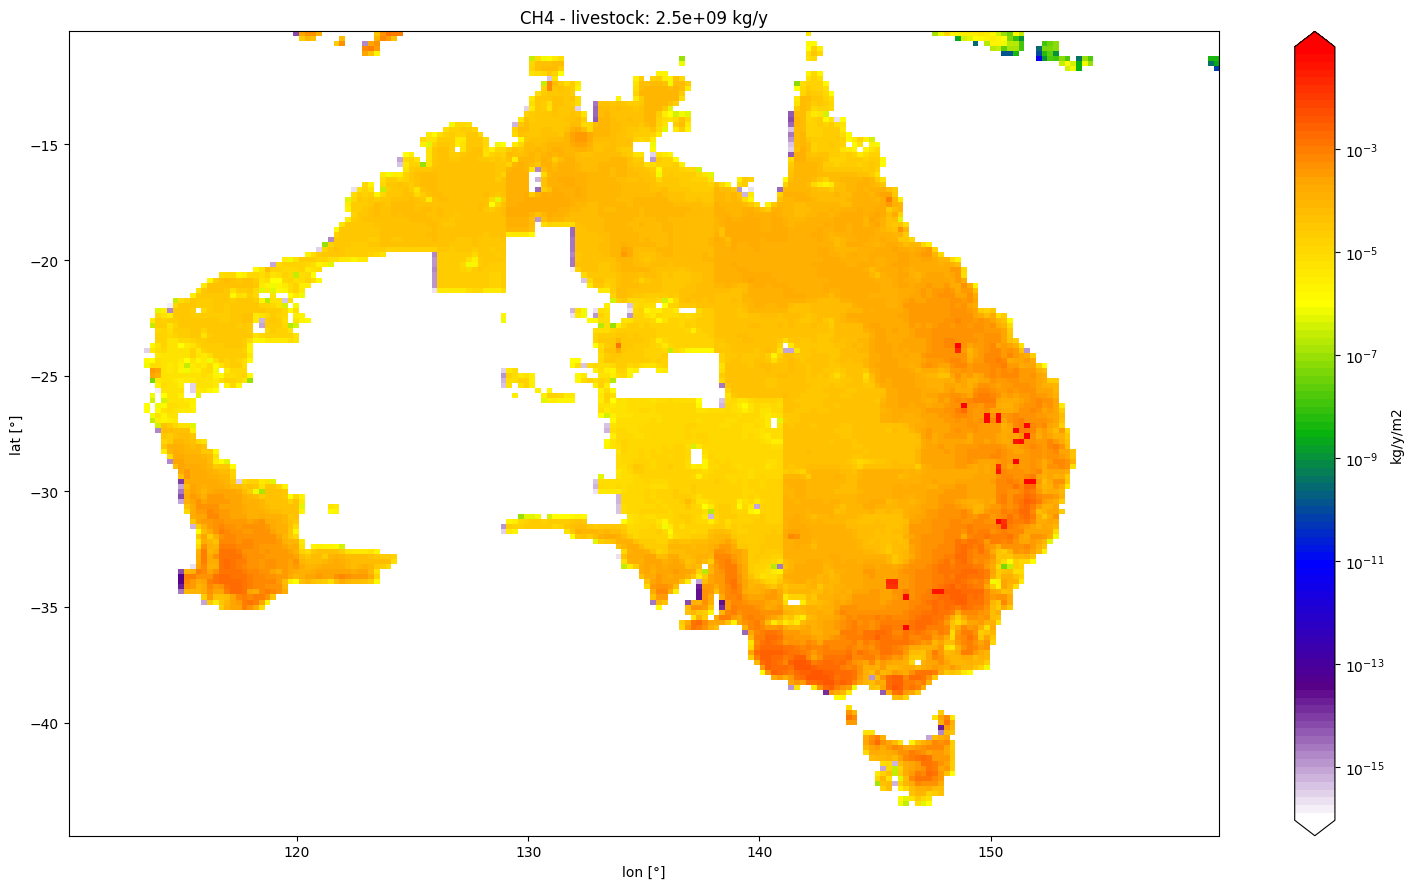

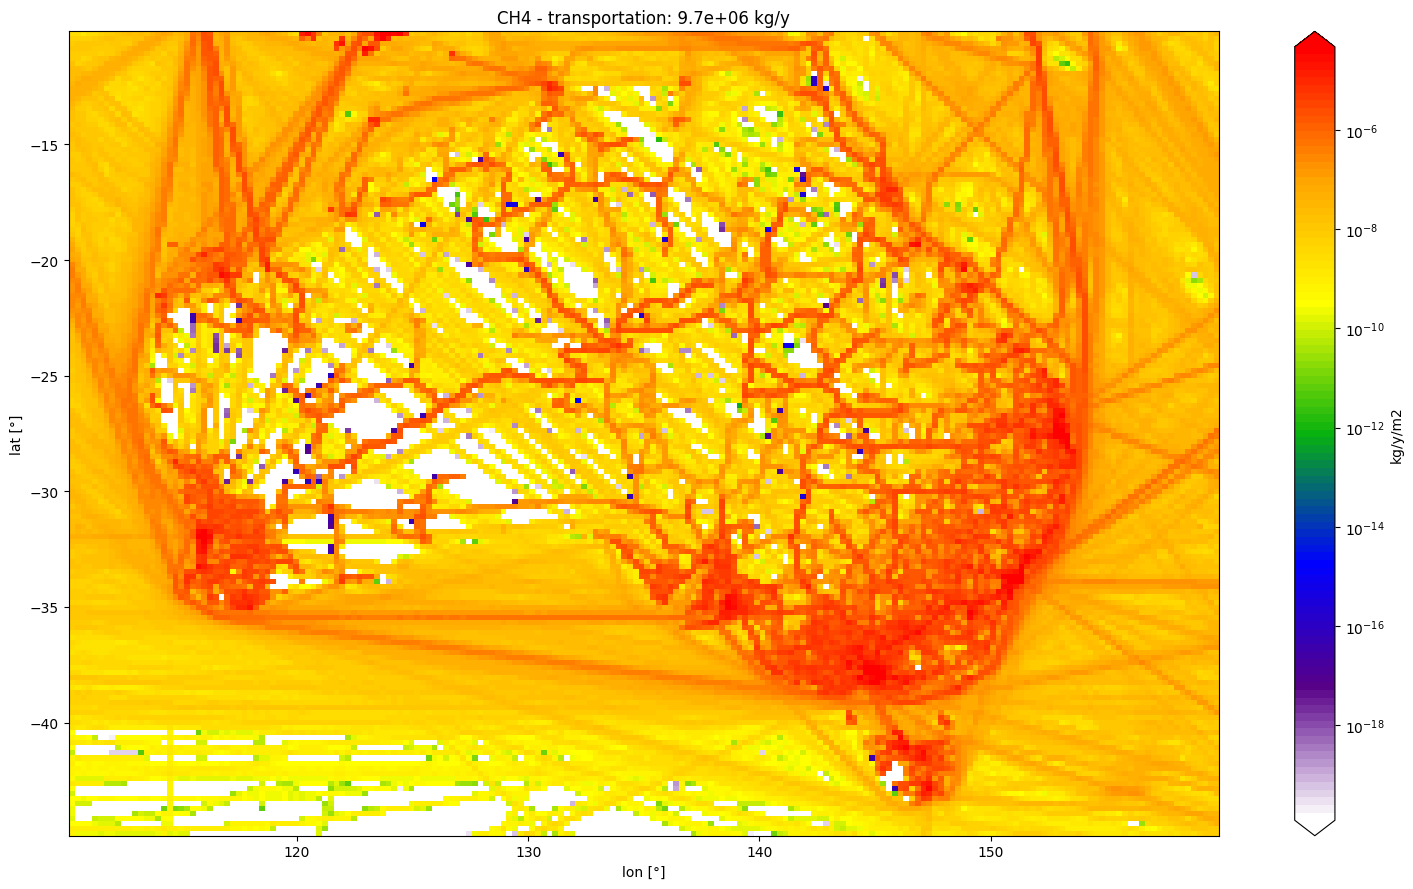

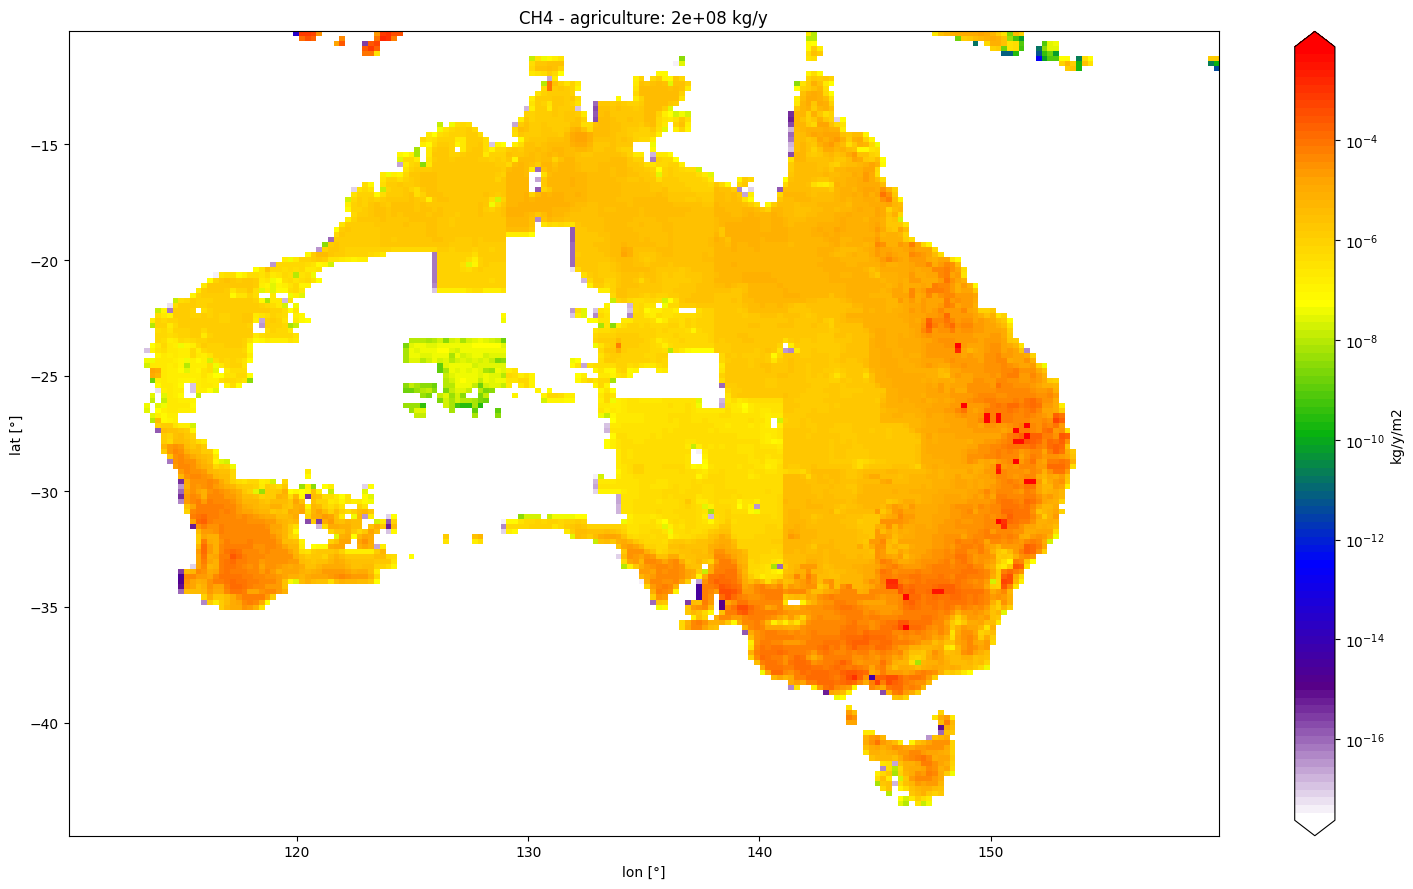

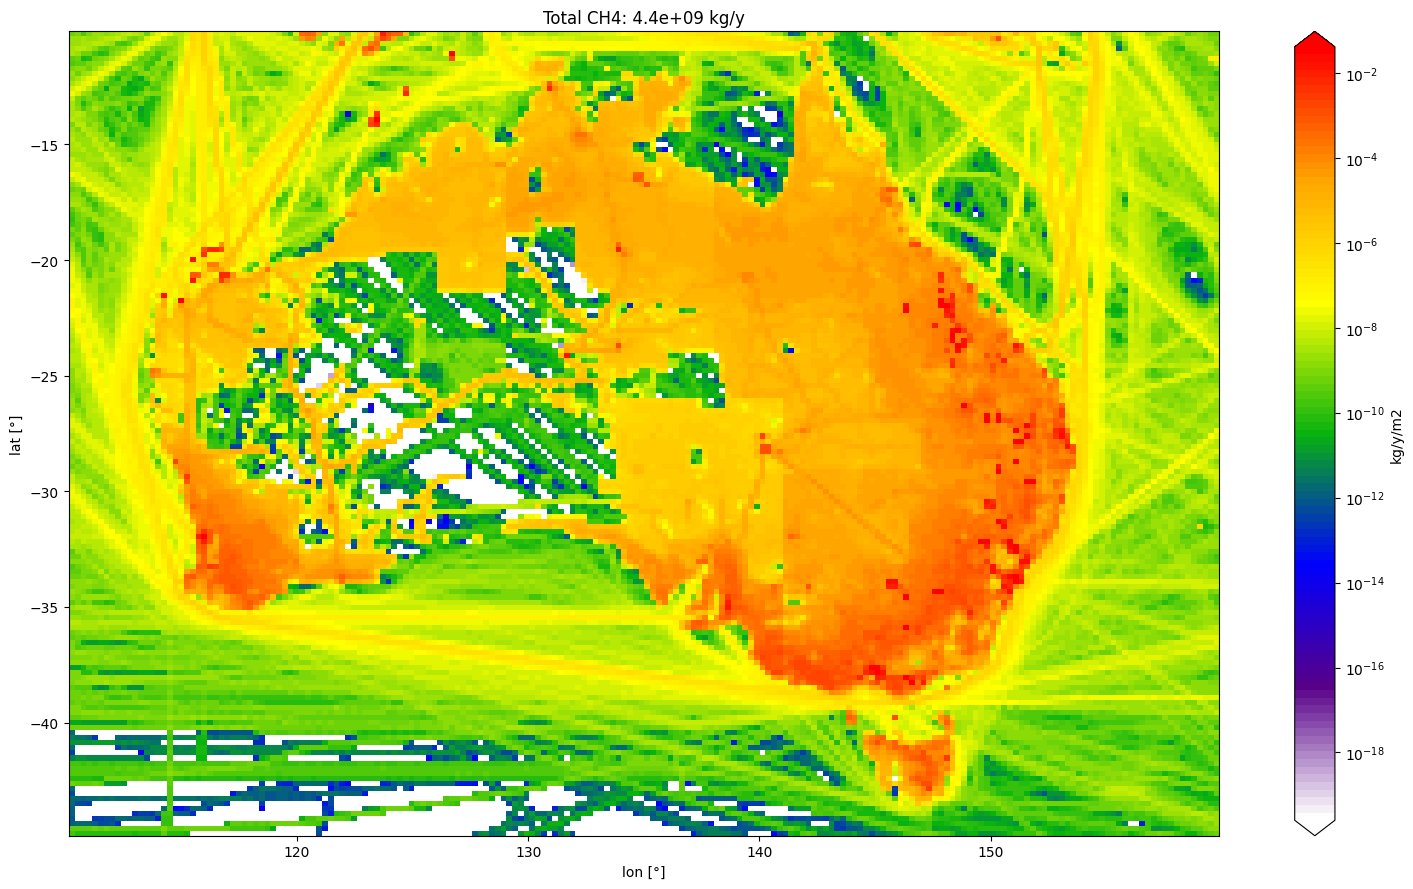

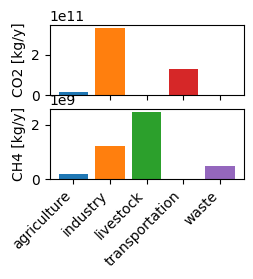

In [12]:
plot_inventory(merged)

## Exporting the inventory 

The main feature of emiproc is that it can export the invenotry to many
different kinds of simulation inputs.

In the example, we will just save the inventory to a netcdf file.


In [18]:
from emiproc.exports.rasters import export_raster_netcdf

export_path = local_dir / "australia.nc"
export_raster_netcdf(merged, export_path)
print("Exported")


Exported


Let's have a look to the file generated.

In [19]:
ds = xr.load_dataset(export_path)
ds

<xarray.Dataset> Size: 3MB
Dimensions:              (lat: 160, lon: 200, substance: 2, category: 5,
                          lon_bnds: 201, lat_bnds: 161)
Coordinates:
  * substance            (substance) <U3 24B 'CO2' 'CH4'
  * category             (category) <U14 280B 'waste' ... 'agriculture'
  * lon                  (lon) float64 2kB 110.1 110.4 110.6 ... 159.6 159.9
  * lat                  (lat) float64 1kB -44.89 -44.67 ... -10.33 -10.11
  * lon_bnds             (lon_bnds) float64 2kB 110.0 110.2 ... 159.8 160.0
  * lat_bnds             (lat_bnds) float64 1kB -45.0 -44.78 ... -10.22 -10.0
Data variables: (12/14)
    CO2_waste            (lat, lon) float64 256kB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    CO2_industry         (lat, lon) float64 256kB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    CO2_transportation   (lat, lon) float64 256kB 3.459e+03 962.6 ... 2.149e+06
    CO2_agriculture      (lat, lon) float64 256kB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    CH4_waste            (lat, lon) float64 256kB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    CH4_industry         (lat, lon) float64 256kB 5.127 2.634 ... 11.41 4.298
    ...                   ...
    CH4_agriculture      (lat, lon) float64 256kB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    emi_CO2_all_sectors  (lat, lon) float64 256kB 3.459e+03 962.6 ... 2.149e+06
    emi_CO2_total        (category) float64 40B 1.625e+07 ... 1.216e+10
    emi_CH4_all_sectors  (lat, lon) float64 256kB 5.443 2.722 ... 21.81 22.64
    emi_CH4_total        (category) float64 40B 4.604e+08 ... 1.982e+08
    cell_area            (lat, lon) float64 256kB 4.801e+08 ... 6.63e+08
Attributes:
    Conventions:      CF-1.10
    title:            emiproc generated file
    comment:          
    source:           
    history:          2024-08-30 10:23:47: created by emiproc ;\n
    references:       Produced by emiproc.
    institution:      Empa, Swiss Federal Laboratories for Materials Science ...
    author:           emiproc
    contact:          https://emiproc.readthedocs.io/en/master/support.html#c...
    creation_time:    2024-08-30 10:23:47
    emiproc_history:  ["Inventory(EDGARv8) created as type:'EDGARv8'", 'Copie...

Plot with xarray to check the data



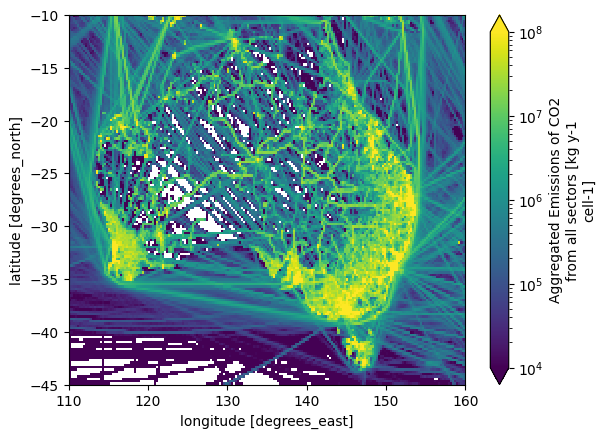

In [15]:
from matplotlib.colors import LogNorm


ds["emi_CO2_all_sectors"].plot(
    # use a logarithmic color scale, otherwise we only see the highest point sources.
    norm=LogNorm(vmin=1e4, vmax=1e8),
    cmap="viridis",
)

Yes the plots we produced with emiproc were nicer. 

## Conclusion

In this tutorial we learned how to process an emissions inventory using emiproc.

Depending your needs, you will have to do use different functions, inventories and export.

If you have any questions, feel free to ask us https://emiproc.readthedocs.io/en/master/support.html#support .